In [50]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as Func
import torchvision
import torchvision.transforms as transforms
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import h5py

In [2]:
transform = transforms.Compose(
    [
      transforms.ToTensor(),
      transforms.RandomHorizontalFlip(),
      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

In [3]:
with h5py.File('Galaxy10_DECals.h5', 'r') as file:
    images = np.array(file['images'])
    labels = np.array(file['ans'])
    dec = np.array(file['dec'])
    pxscale = np.array(file['pxscale'])
    re = np.array(file['ra'])
    redshift = np.array(file['redshift'])
    print("Keys: %s" % file.keys())

#images, labels - галактики и их классы, dec, pxscale, re, redshift вряд ли пригодятся

Keys: <KeysViewHDF5 ['ans', 'dec', 'images', 'pxscale', 'ra', 'redshift']>


In [16]:
classes = { 
            0: "Disturbed Galaxy",
            1: "Merging Galaxy",
            2: "Round Smooth Galaxy",
            3: "In-between Round Smooth Galaxy",
            4: "Cigar Shaped Smooth Galaxy",
            5: "Barred Spiral Galaxy",
            6: "Unbarred Tight Spiral Galaxy",
            7: "Unbarred Loose Spiral Galaxy",
            8: "Edge-on Galaxy without Bulge",
            9: "Edge-on Galaxy with Bulge"
           }

#названия классов

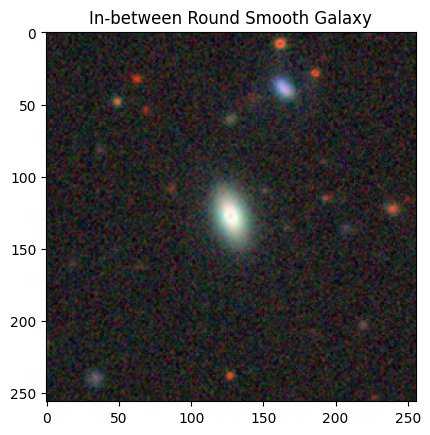

In [71]:
#вывел рандомный снимок
number = 7605
numpy_img = images[number]
plt.title(classes[labels[number]])
plt.imshow(numpy_img)
plt.show()

In [46]:
labels_binary = torch.tensor(labels[2934:7605], dtype=torch.float32)
images_binary = torch.tensor(images[2934:7605], dtype=torch.float32)
#тут я просто выбрал изображения только 2 классов галактик (2 и 3 классы) для дальнейшей классфикации 

In [63]:
dataset = torch.utils.data.TensorDataset(images_binary, labels_binary)

In [52]:
train_set, test_set = train_test_split(dataset, test_size=0.2)

In [57]:
batch_size = 4
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, num_workers=2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([4, 256, 256, 3])
tensor(2.)


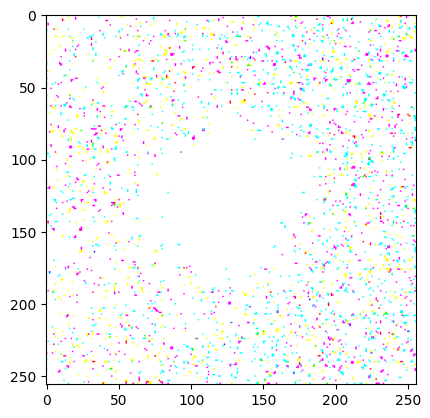

In [70]:
# я запихал все в dataloader, но возникает вопрос - нужно делать reshape, 
# ибо один батч с картинками имеет shape (4, 256, 256, 3), а должно вроде быть (4, 3, 256, 256)
for image, label in train_loader:
    plt.imshow(image[0])
    print(image.shape)
    print(label[0])
    break